Tasks:
- Compress a gray scale image using PCA, then visualize the compresses
image
- Decompress the compressed image and visualize it
- Don’t use the PCA built-in function
- Group of 2
- Bonus:
- Compress a group of images that can be grouped into less number of images containing the
common features (hint: search for eigen faces)
- Compress a colored image instead of a gray image

# Let's compress a gray scale image of a mouse using PCA!

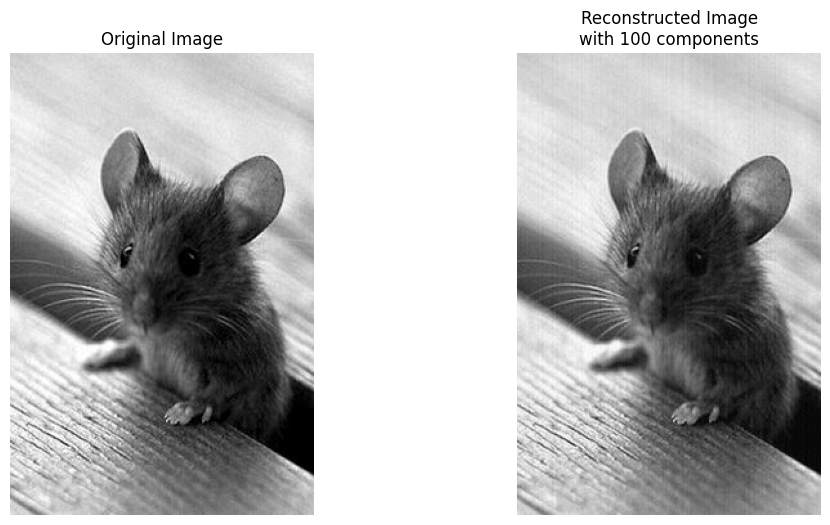

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def manualPCA(image_path = "/content/drive/MyDrive/graymouse.png", num_components = 100):
  img = Image.open(image_path).convert('L')
  img_array = np.array(img)
  standardized_array = (img_array - np.mean(img_array)) / np.std(img_array)
  # this step is to make the data centred around the origin for calculating
  # the covariance
  cov_matrix = np.cov(standardized_array.T)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  # sort the eigen values in descending order
  sorted_indices = np.argsort(eigenvalues)[::-1]
  eigenvalues = eigenvalues[sorted_indices]
  eigenvectors = eigenvectors[:, sorted_indices]

  selected_eigenvectors = eigenvectors[:, :num_components]

  projected_data = np.dot(standardized_array, selected_eigenvectors)

  reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)
  reconstructed_data = (reconstructed_data * np.std(img_array)) + np.mean(img_array)


  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].imshow(img_array, cmap='gray')
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(reconstructed_data, cmap='gray')
  axes[1].set_title(f'Reconstructed Image\nwith {num_components} components')
  axes[1].axis('off')

  plt.show()
manualPCA()

# Let's compress a colored image of a hamster using PCA!

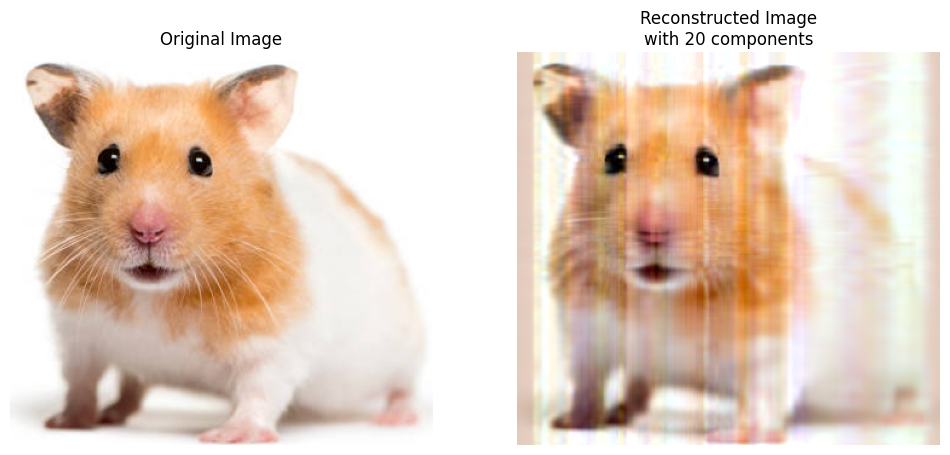

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def manualPCA(image_path = "/content/drive/MyDrive/hamsterincolor.png", num_components = 20):
  img = Image.open(image_path)
  img_array = np.array(img)
  reconstructed_channels = []
  for i in range(3):
    channel = img_array[:, :, i]
    standardized_array = (channel - np.mean(channel)) / np.std(channel)
    cov_matrix = np.cov(standardized_array.T)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    selected_eigenvectors = eigenvectors[:, :num_components]
    projected_data = np.dot(standardized_array, selected_eigenvectors)
    reconstructed_data = np.dot(projected_data, selected_eigenvectors.T)
    reconstructed_data = (reconstructed_data * np.std(channel)) + np.mean(channel)
    reconstructed_data = np.clip(reconstructed_data, 0, 255)
    reconstructed_channels.append(reconstructed_data.astype(np.uint8))

  reconstructed_img = np.stack(reconstructed_channels, axis=2)

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  axes[0].imshow(img)
  axes[0].set_title('Original Image')
  axes[0].axis('off')

  axes[1].imshow(reconstructed_img)
  axes[1].set_title(f'Reconstructed Image\nwith {num_components} components')
  axes[1].axis('off')

  plt.show()

manualPCA()


# Let's make eigen faces!

(400, 64, 64)
(400, 4096)


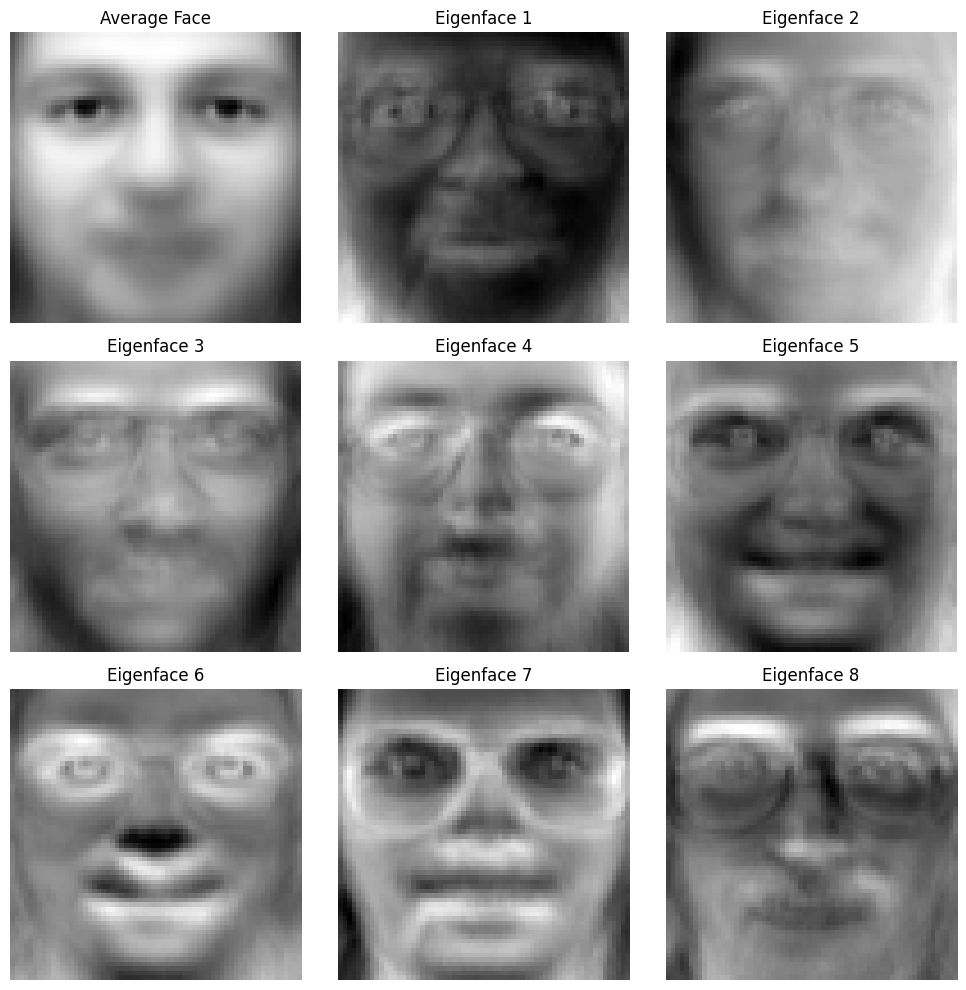

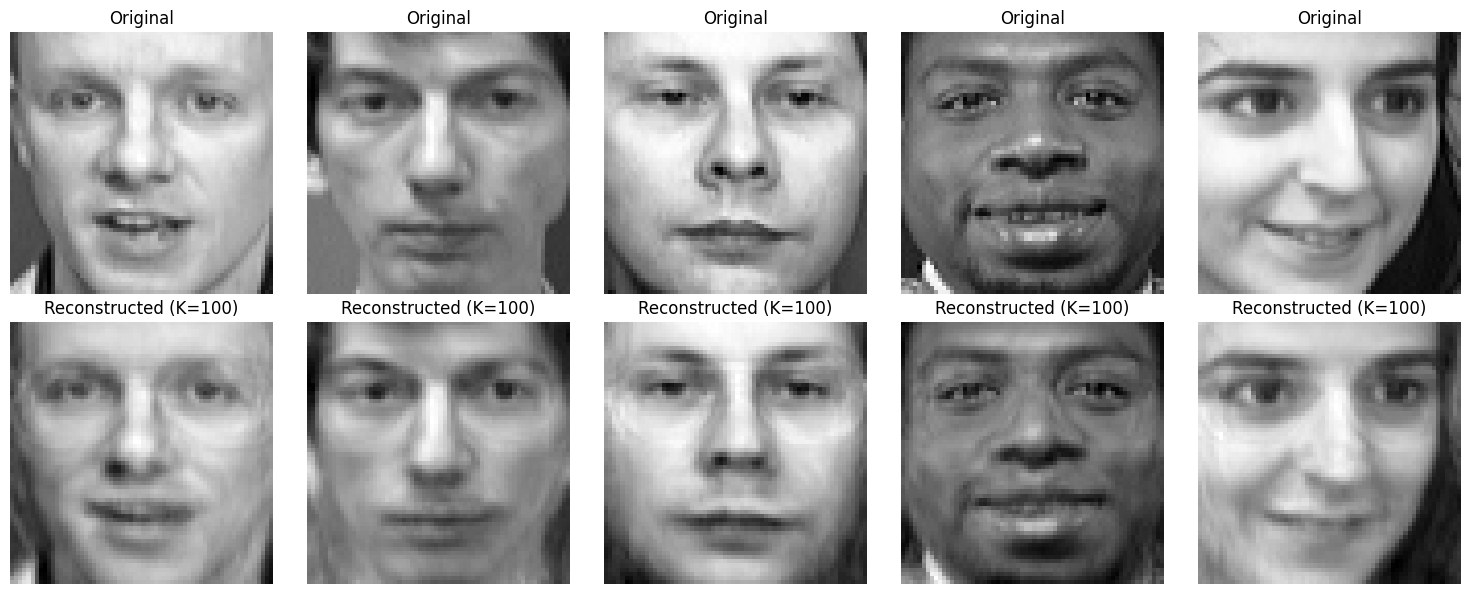

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# Load the Olivetti Faces dataset
faces_data = fetch_olivetti_faces(shuffle=True, random_state=42)
print(faces_data.images.shape)
data = faces_data.images.reshape(faces_data.images.shape[0], -1)  # Flatten images
print(data.shape)
mean_face = np.mean(data, axis=0)
centered_data = data - mean_face
cov_matrix = np.cov(centered_data.T)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
# sort the eigenvalues and corresponding eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
K = 100
selected_eigenvectors = eigenvectors[:, :K]
projected_data = np.dot(centered_data, selected_eigenvectors)
reconstructed_data = np.dot(projected_data, selected_eigenvectors.T) + mean_face

# Plot the mean face
plt.figure(figsize=(10, 10))
plt.subplot(3, 3, 1)
plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.title('Average Face')
plt.axis('off')

# Plot the first 8 eigenfaces
for i in range(8):
    plt.subplot(3, 3, i + 2)
    plt.imshow(selected_eigenvectors[:, i].reshape(64, 64), cmap='gray')
    plt.title(f'Eigenface {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot original vs reconstructed images
num_images_to_show = 5
fig, axes = plt.subplots(2, num_images_to_show, figsize=(15, 6))

for i in range(num_images_to_show):
    # Show original image
    axes[0, i].imshow(data[i].reshape(64, 64), cmap='gray')
    axes[0, i].set_title('Original')
    axes[0, i].axis('off')

    # Show reconstructed image
    axes[1, i].imshow(reconstructed_data[i].reshape(64, 64), cmap='gray')
    axes[1, i].set_title(f'Reconstructed (K={K})')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()
